In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загружаем данные из двух файлов-источников

In [2]:
data_part_1 = pd.read_excel('../data/data_raw/X_bp.xlsx', sheet_name='X_bp.csv', index_col=0)
data_part_1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [3]:
data_part_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [4]:
data_part_2 = pd.read_excel('../data/data_raw/X_nup.xlsx', sheet_name='X_nup.csv', index_col=0)
data_part_2

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.000000,57.000000
1,0,4.000000,60.000000
2,0,4.000000,70.000000
3,0,5.000000,47.000000
4,0,5.000000,57.000000
...,...,...,...
1035,90,8.088111,47.759177
1036,90,7.619138,66.931932
1037,90,9.800926,72.858286
1038,90,10.079859,65.519479


In [5]:
data_part_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   int64  
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


### Контрольная проверка по двум датасетам: смотрим на несовпадающие индексы и их количество

In [6]:
index_list_1 = data_part_1.index.tolist()
index_list_2 = data_part_2.index.tolist()
not_matched_indexes = set(index_list_1) ^ set(index_list_2)


print(f'count index 1: {len(index_list_1)}, count index 2: {len(index_list_2)}, difference: {len(index_list_2) - len(index_list_1)}')
print(f'not matched indexes: {not_matched_indexes}, has count total: {len(not_matched_indexes)}')

count index 1: 1023, count index 2: 1040, difference: 17
not matched indexes: {1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039}, has count total: 17


### Собираем один датасет из двух источников данных

In [7]:
data = data_part_1.join(data_part_2, how='left')
data

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [8]:
# Делаем проверку на отсутствие пустых значений
data.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [9]:
data.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


### Переименовываем колонки для удобства дальнейшей работы

In [10]:
new_names = ['matrix_filler_ratio', 'density', 'elasticity', 'hardener', 'epoxid', 'temperature', 'surface_density', 'elasticity_on_stretching', 'solidity_on_stretching', 'resin', 'cover_angle', 'cover_step', 'cover_strength']
true_names = data.columns.tolist()

# Создаём словарь {'исходные': 'новые'} наименования
dict_of_col_names = dict(zip(true_names, new_names))
dict_of_col_names

{'Соотношение матрица-наполнитель': 'matrix_filler_ratio',
 'Плотность, кг/м3': 'density',
 'модуль упругости, ГПа': 'elasticity',
 'Количество отвердителя, м.%': 'hardener',
 'Содержание эпоксидных групп,%_2': 'epoxid',
 'Температура вспышки, С_2': 'temperature',
 'Поверхностная плотность, г/м2': 'surface_density',
 'Модуль упругости при растяжении, ГПа': 'elasticity_on_stretching',
 'Прочность при растяжении, МПа': 'solidity_on_stretching',
 'Потребление смолы, г/м2': 'resin',
 'Угол нашивки, град': 'cover_angle',
 'Шаг нашивки': 'cover_step',
 'Плотность нашивки': 'cover_strength'}

In [11]:
data = data.rename(columns = dict_of_col_names)
data

,matrix_filler_ratio,density,elasticity,hardener,epoxid,temperature,surface_density,elasticity_on_stretching,solidity_on_stretching,resin,cover_angle,cover_step,cover_strength
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


### Трансформируем колонку cover_angle (Угол нашивки), где всего два варианта значений - 0 и 90 градусов - в категориальный вид через кодировку 0 или 1

In [12]:
data['cover_angle'].unique()

array([ 0, 90], dtype=int64)

In [13]:
data['cover_angle'] = data['cover_angle'].map({0: 0, 90: 1})
data['cover_angle'].unique()

array([0, 1], dtype=int64)

### Общий взгляд на три целевые переменные

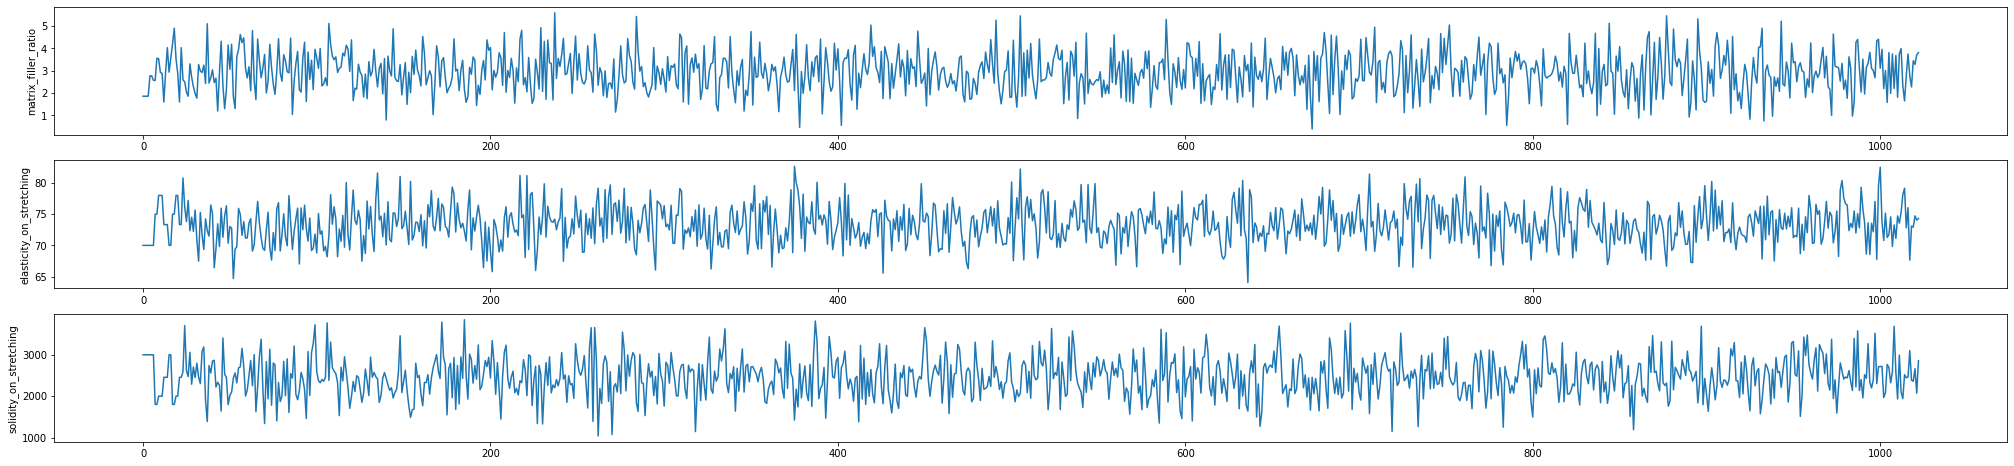

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(35, 8))
sns.lineplot(data=data, x=data.index.tolist(), y='matrix_filler_ratio', ax=ax[0])
sns.lineplot(data=data, x=data.index.tolist(), y='elasticity_on_stretching', ax=ax[1])
sns.lineplot(data=data, x=data.index.tolist(), y='solidity_on_stretching', ax=ax[2])
plt.show()

<AxesSubplot:xlabel='matrix_filler_ratio', ylabel='Count'>

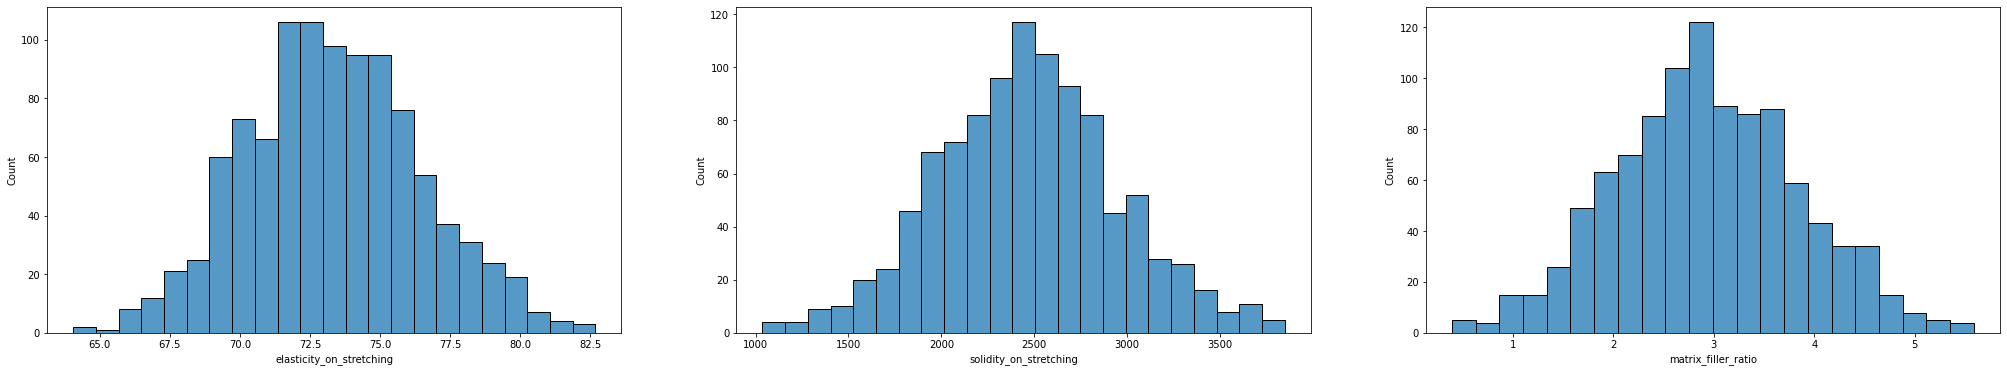

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(35, 6))
sns.histplot(data['elasticity_on_stretching'], ax=ax[0])
sns.histplot(data['solidity_on_stretching'], ax=ax[1])
sns.histplot(data['matrix_filler_ratio'], ax=ax[2])

### Из исходного датасета делаем три отдельных датасета под поставленные три задачи (на три разные целевые переменные), убрав ненужные колонки.  

In [16]:
data_elasticity_on_stretching = data.drop(columns=['solidity_on_stretching']) # Датасет для задачи, где целевая переменная 'Модуль упругости при растяжении, ГПа'
data_solidity_on_stretching = data.drop(columns=['elasticity_on_stretching']) # Датасет для задачи, где целевая переменная 'Прочность при растяжении, МПа'
data_matrix_filler = data

In [17]:
data_elasticity_on_stretching.sample(10)

,matrix_filler_ratio,density,elasticity,hardener,epoxid,temperature,surface_density,elasticity_on_stretching,resin,cover_angle,cover_step,cover_strength
408,1.678846,1954.634295,589.769160,156.876798,25.916763,300.302814,738.117478,74.291907,245.629703,0,5.078708,82.750271
766,3.272840,1969.044801,616.846433,109.117129,19.383979,306.160227,843.154257,70.134387,219.350696,1,4.966053,61.411246
218,4.802416,1953.710048,1038.508782,118.999585,25.188429,277.546457,463.400605,74.456656,234.430573,0,13.732404,64.510465
546,2.407571,1936.109248,807.414387,122.749080,23.564783,248.132367,930.695170,71.930144,138.219874,1,6.024520,49.631223
94,1.620930,2110.566437,124.133740,191.053004,21.590295,280.120468,4.099043,72.680412,171.988605,0,7.388167,45.459778
332,2.686598,1831.559944,40.383455,130.894546,25.572154,188.918674,1151.117374,72.076773,145.869678,0,11.705106,32.147657
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,117.730099,1,10.565614,53.750790
566,1.620786,1901.357022,842.301190,151.259793,22.878357,314.622062,519.668523,74.615810,300.534497,1,7.468243,64.854936
217,4.414416,1901.586009,1000.289288,98.244089,24.481028,288.401849,399.870134,81.203147,251.359279,0,2.511647,75.348275
715,2.009728,1856.029075,711.461689,120.828679,25.586728,295.217201,93.444371,75.692768,309.803579,1,10.198703,63.742401


In [18]:
data_solidity_on_stretching.sample(10)

,matrix_filler_ratio,density,elasticity,hardener,epoxid,temperature,surface_density,solidity_on_stretching,resin,cover_angle,cover_step,cover_strength
898,1.686885,2079.483100,523.735966,88.940285,20.469049,370.304233,336.340102,1793.473754,126.411866,1,4.748129,59.142790
805,1.424189,1977.621657,123.729979,135.714224,18.515894,318.436305,171.677776,2220.733566,131.882738,1,7.010009,66.165229
458,2.127935,1990.495542,667.836803,80.474542,24.998201,330.675199,402.772337,2511.373624,295.458299,0,9.619577,65.152154
734,2.546782,1854.074417,869.296654,141.464466,19.370649,316.051131,564.800906,1264.310682,257.467826,1,8.682344,56.791692
566,1.620786,1901.357022,842.301190,151.259793,22.878357,314.622062,519.668523,2199.094352,300.534497,1,7.468243,64.854936
872,2.726567,2123.461165,1338.880831,72.660414,21.982327,223.985566,277.093363,2298.076832,167.165627,1,6.983436,54.904122
216,2.509977,1912.215145,1056.096385,87.198840,21.883152,252.331069,781.355358,2029.147825,206.428712,0,0.145034,54.138756
544,1.983301,1904.960736,197.482671,116.171626,24.164000,331.039146,1165.544484,2808.127378,249.729629,1,8.479259,65.264244
493,2.068641,2014.797981,1083.186235,87.842144,22.178914,250.472074,554.583489,2160.577394,118.670841,0,0.571835,36.628878
914,1.093208,2042.816781,579.454590,172.570539,25.891790,324.066058,778.196967,3144.482872,97.269314,1,7.556190,57.827522


In [19]:
data_matrix_filler.sample(10)

,matrix_filler_ratio,density,elasticity,hardener,epoxid,temperature,surface_density,elasticity_on_stretching,solidity_on_stretching,resin,cover_angle,cover_step,cover_strength
813,3.649739,1976.146239,712.379573,157.541400,22.736201,307.650734,432.251636,73.423258,2668.738929,204.844970,1,6.511228,68.664498
806,3.976382,2052.028890,814.842960,110.689775,21.932620,351.771502,1012.292944,70.866458,3372.771114,192.457518,1,7.859056,64.358246
188,3.154426,1947.072412,822.605132,100.047074,23.417794,381.857725,698.788648,78.854305,3018.452658,154.108613,0,3.112147,28.661632
298,2.385109,2129.059629,589.782966,70.760954,14.254985,302.043927,676.050552,76.472254,2529.945213,92.307158,0,4.650262,63.956692
349,2.870681,1984.839475,923.084499,117.290319,20.555344,233.417884,1120.684970,70.777964,2347.009635,108.342435,0,1.565613,40.471911
35,3.247617,1813.234600,757.874479,81.379871,23.422465,279.080157,575.062857,69.341133,3188.136358,252.870569,1,9.000000,70.000000
258,2.906383,2013.083059,989.043793,108.013185,22.370657,258.991905,32.863455,71.146135,3654.434359,298.092880,0,7.181308,50.348442
314,1.497759,1885.577035,484.934757,104.334061,21.904042,251.560404,799.130480,72.803398,2748.940902,177.732791,0,6.526371,42.253595
182,2.103374,1905.642757,1459.570541,105.918370,23.682252,238.120039,495.674767,74.128481,1809.993249,190.263824,0,9.418651,52.511618
684,4.594119,1935.851491,626.971764,125.843579,20.919002,274.225679,505.856488,74.026399,3130.333642,326.703575,1,4.446795,56.260700


In [20]:
data_matrix_filler.describe().T

,count,mean,std,min,25%,50%,75%,max
matrix_filler_ratio,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
density,1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
elasticity,1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
hardener,1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
epoxid,1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
temperature,1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
surface_density,1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
elasticity_on_stretching,1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
solidity_on_stretching,1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
resin,1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


### Сохраняем датасеты

In [21]:
data_elasticity_on_stretching.to_csv('../data/data_processing/elasticity_on_stretching.csv', sep=';', index=True)
data_solidity_on_stretching.to_csv('../data/data_processing/solidity_on_stretching.csv', sep=';', index=True)
data_matrix_filler.to_csv('../data/data_processing/matrix_filler_ratio.csv', sep=';', index=True)